In [1]:
import sys
sys.path.append("..")

import numpy as np
import pandas as pd
import os
import sklearn
from csge.csge import CoopetitiveSoftGatingEnsemble as CSGE

from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn import tree

import matplotlib.pyplot as plt


6354


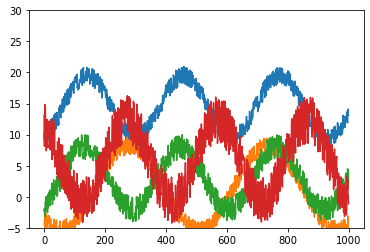

In [190]:
# Generate a number of time series with mean, std, and trend (sin function)
#np.random.seed(1243)
#2565

seed = np.random.randint(0, 10000)
print(seed)
np.random.seed(5283)

ts_length = 1000
num_ts = 15

sin_min = 10
sin_max = 30

sin_add_min = 5
sin_add_max = 8

means = np.random.randint(0, 20, num_ts)
stds = np.random.randint(0, 5, num_ts)

tss = []
for i in range(num_ts):
    x_axis = np.arange(1000) / np.pi / np.random.randint(sin_min, sin_max) + np.random.uniform(0, 2 * np.pi)
    sin_signal = np.sin(x_axis) * np.random.uniform(sin_add_min, sin_add_max)
    ts = np.random.uniform(0, 1, size=(1000)) * stds[i] + sin_signal + means[i] 
    
    tss.append(ts)

input_ts = np.array(tss).transpose()

x_axis = np.arange(1000) / np.pi / np.random.randint(sin_min, sin_max) + np.random.uniform(0, 2 * np.pi)
sin_signal = np.sin(x_axis) * np.random.uniform(sin_add_min, sin_add_max)

target_ts = np.random.uniform(0,1,size=(1000)) * np.random.uniform(0, 10, 1) + np.random.uniform(0, 20, 1)
target_ts += sin_signal

#ts_1 = np.random.randint(0,1000,size=(1000)) / 1000 * np.random.uniform(0, 3, 1) + np.random.uniform(0, 10, 1)
#ts_2 = np.random.randint(0,1000,size=(1000)) / 1000 * np.random.uniform(0, 3, 1) + np.random.uniform(0, 10, 1)
#ts_3 = np.random.randint(0,1000,size=(1000)) / 1000 * np.random.uniform(0, 2, 1) + np.random.uniform(0, 5, 1)

#target_ts = np.random.randint(0,1000,size=(1000)) / 1000 * np.random.uniform(0, 10, 1) + np.random.uniform(0, 50, 1)

#input_ts = np.stack((ts_1, ts_2, ts_3), axis=1)

fig = plt.figure()
ax = fig.add_subplot()
#fig
ax.set_ylim(-5, 30)
ax.plot(tss[0])
ax.plot(tss[1])
ax.plot(tss[2])
ax.plot(target_ts)

In [191]:
forecast_range = 10

input_ts_expanded = []
target_ts_expanded = []

for i in range(len(input_ts) - forecast_range):
    target_ts_expanded.append(target_ts[i:i+forecast_range])
    for fc in range(forecast_range):
        entry = list(input_ts[i])
        entry.append(fc)
        input_ts_expanded.append(np.array(entry))
        
        
input_ts_expanded = np.array(input_ts_expanded)
target_ts_expanded = np.array(target_ts_expanded)
target_ts_expanded = target_ts_expanded.reshape(-1, 1)

    #print(i)


In [192]:
split_index = int(len(input_ts_expanded) * 0.8)

X_train = input_ts_expanded[:split_index]
y_train = target_ts_expanded[:split_index]
X_test = input_ts_expanded[split_index:]
y_test = target_ts_expanded[split_index:]

# Time-Dependent Weighting

In [193]:
ensemble = CSGE(
    ensembles_types = [LinearRegression, sklearn.svm.SVR, tree.DecisionTreeRegressor],
    error_function=mean_absolute_error,
    eta=[3.5, 3.5, 3.5],
    leadtime_k=forecast_range
    #type='regression',
    )
ensemble.fit(X_train, y_train)

In [194]:
res = ensemble.predict(X_test)

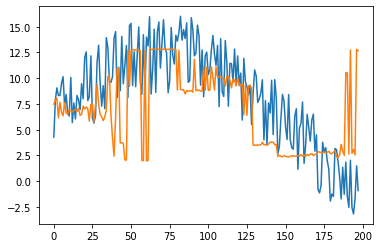

In [195]:
plt.plot(y_test[::10])
plt.plot(res[::10])
plt.show()

# Feature Split

In [196]:
feature_indizes = []
list_range = list(range(num_ts))

for i in range(3):
    randint = np.random.randint(3, 7)
    feature_indizes.append(np.random.choice(list_range, size=randint, replace=False))
feature_indizes = np.array(feature_indizes)

<ipython-input-196-2e94728e9d19>:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  feature_indizes = np.array(feature_indizes)


In [197]:
feature_indizes

array([array([14,  6,  7,  2, 10,  1]), array([ 5, 13, 10,  1,  7]),
       array([ 4, 12, 14, 10])], dtype=object)

In [198]:
ensemble = CSGE(
    ensembles_types = [LinearRegression, sklearn.svm.SVR, tree.DecisionTreeRegressor],
    feature_indizes=feature_indizes,
    error_function=mean_absolute_error,
    eta=[3.5, 3.5, 3.5],
    leadtime_k=forecast_range
    #type='regression',
    )
ensemble.fit(X_train, y_train)

In [199]:
res = ensemble.predict(X_test)

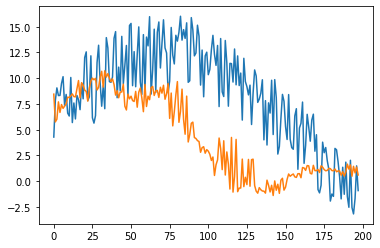

In [200]:
plt.plot(y_test[::10])
plt.plot(res[::10])
plt.show()